In [23]:
from Projects.Functions.Context.context import ProjectContext
from Projects.Functions.Data_cleaning.Data_cleaning import *
from Projects.Functions.EDA.eda import *
from Projects.Functions.Report.report import Report
from scipy.stats import iqr, shapiro,kstest

In [24]:
report=Report("Raisins_analysis")
test = (ProjectContext()
        .add_project_title("Test EDA Prject")
        .add_project_reason("test reason")
        .add_project_goal("test Goal")
        .add_project_data_source("test source")
        .get_context())
report.doc_add_paragraph(test)

In [25]:
report.doc_add_heading("Lecture du dataset")
df= dataset_reading(r"C:\Users\tallar\Documents\PROJETS\EDA_and_ML\Projects\Project_EDA\Repositories\Data\Raisin_Dataset.csv")
cible="Class"
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [26]:
size, shape = dataset_dimensions(df)
report.add_combo("Dimensions du dataset", f" size : {size} \n shape : {shape}")
print(size,shape)

7200 (900, 8)


In [27]:
print(dataset_data_types(df))
report.add_combo("Les types de données")
report.doc_add_table(dataset_data_types(df))

                       0
Area               int64
MajorAxisLength  float64
MinorAxisLength  float64
Eccentricity     float64
ConvexArea         int64
Extent           float64
Perimeter        float64
Class              int64


In [28]:
print(dataset_stats(df))
report.add_combo("Les statistiques de base", str(dataset_stats(df)))

                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter       Class  
count     900.000000  900.000000   900.000000  900.000000  
mean    91186.090000    0.699508  1165.906636    0.500000  
std     40769.290132    0.053468   273.764315    0.500278  
min     26139.000000    0.379856   619.074000    0.000000  
25%     61513.250000    0.670869   966.410750    0.

In [29]:
print(dataset_duplicates(df))
report.add_combo("Les doublons", str(dataset_duplicates(df)))

0


In [30]:
print(dataset_categorical_values(df))
report.add_combo("Les données de type catégorielles", str(dataset_categorical_values(df)))

[]


In [31]:
print(dataset_numerical_values(df))
report.add_combo("Les données de type numérique", str(dataset_numerical_values(df)))

['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class']


In [32]:
print(dataset_na_values(df))
report.add_combo("Les données non valides", str(dataset_na_values(df)))

0


In [33]:
df = dataset_na_fill(df,cible)

In [34]:
df= dataset_na_drop(df)

<Figure size 100x100 with 0 Axes>

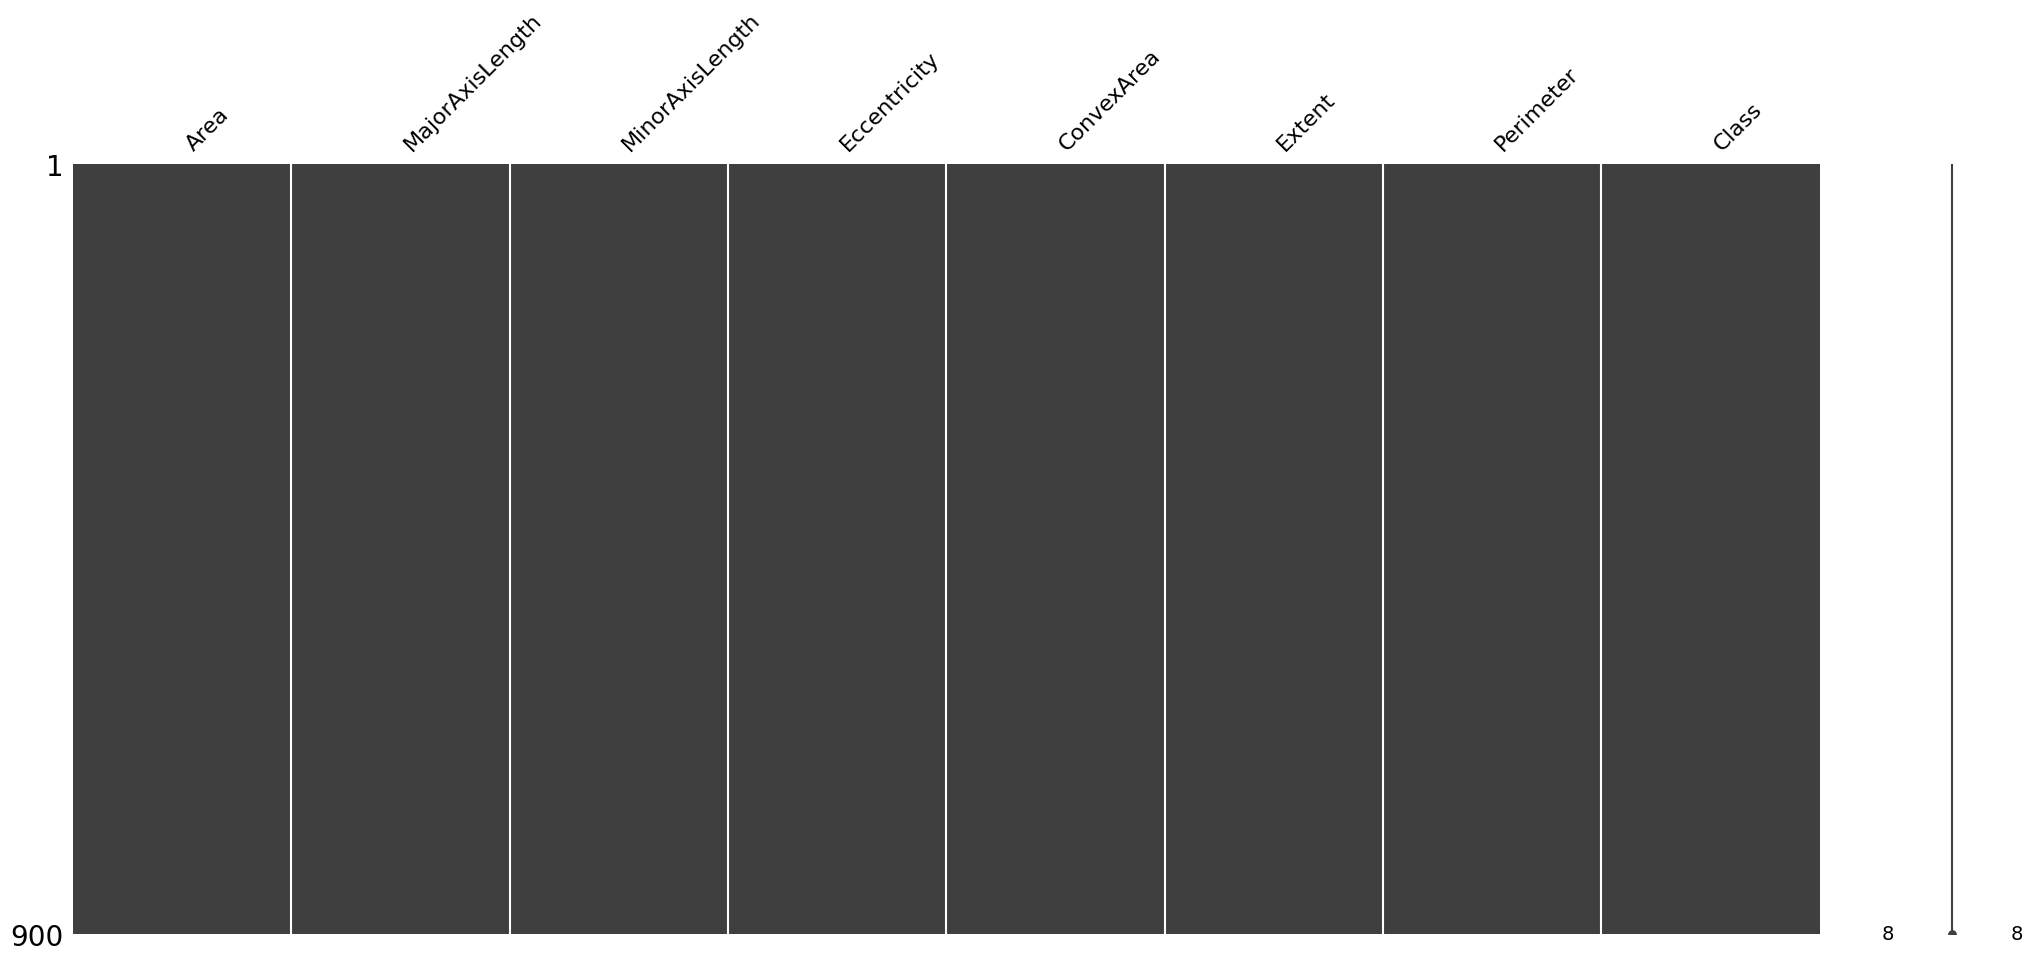

In [35]:
dataset_missing_values(df)

In [36]:
analyses = category_data_analysis(df,cible)
print(analyses)

cats
[]



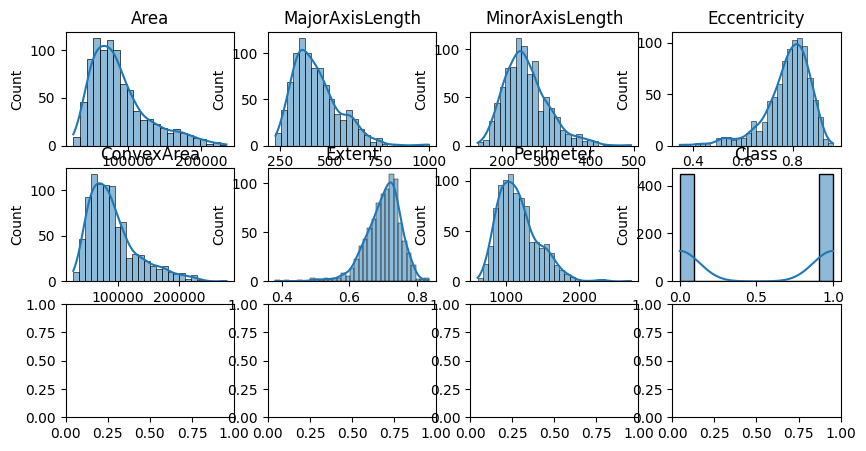

In [37]:
analyses = distribution_analysis_for_int_and_float_features(df,"vide")

In [38]:
texte, infos, liste_norm, test = checking_normality_of_features(df,0.05,kstest)
print(texte)

<function kstest at 0x000002213E805F80>
 feature Area : 
 stats:1.0 
 p_value:0.0 
 > Distribution normale des données (Test de <function kstest at 0x000002213E805F80>) : Mise en place des hypothèses (alpha) = 0.05:
H0 > (les données suivent une distribution normale)
H1 > (les données ne suivent pas une distribution normale) 

Ci-dessous les champs du dataset qui ne semblent pas suivre une distribution suivant le test de <function kstest at 0x000002213E805F80>
 feature MajorAxisLength : 
 stats:1.0 
 p_value:0.0 
 > Distribution normale des données (Test de <function kstest at 0x000002213E805F80>) : Mise en place des hypothèses (alpha) = 0.05:
H0 > (les données suivent une distribution normale)
H1 > (les données ne suivent pas une distribution normale) 

Ci-dessous les champs du dataset qui ne semblent pas suivre une distribution suivant le test de <function kstest at 0x000002213E805F80>
 feature MinorAxisLength : 
 stats:1.0 
 p_value:0.0 
 > Distribution normale des données (Test de 

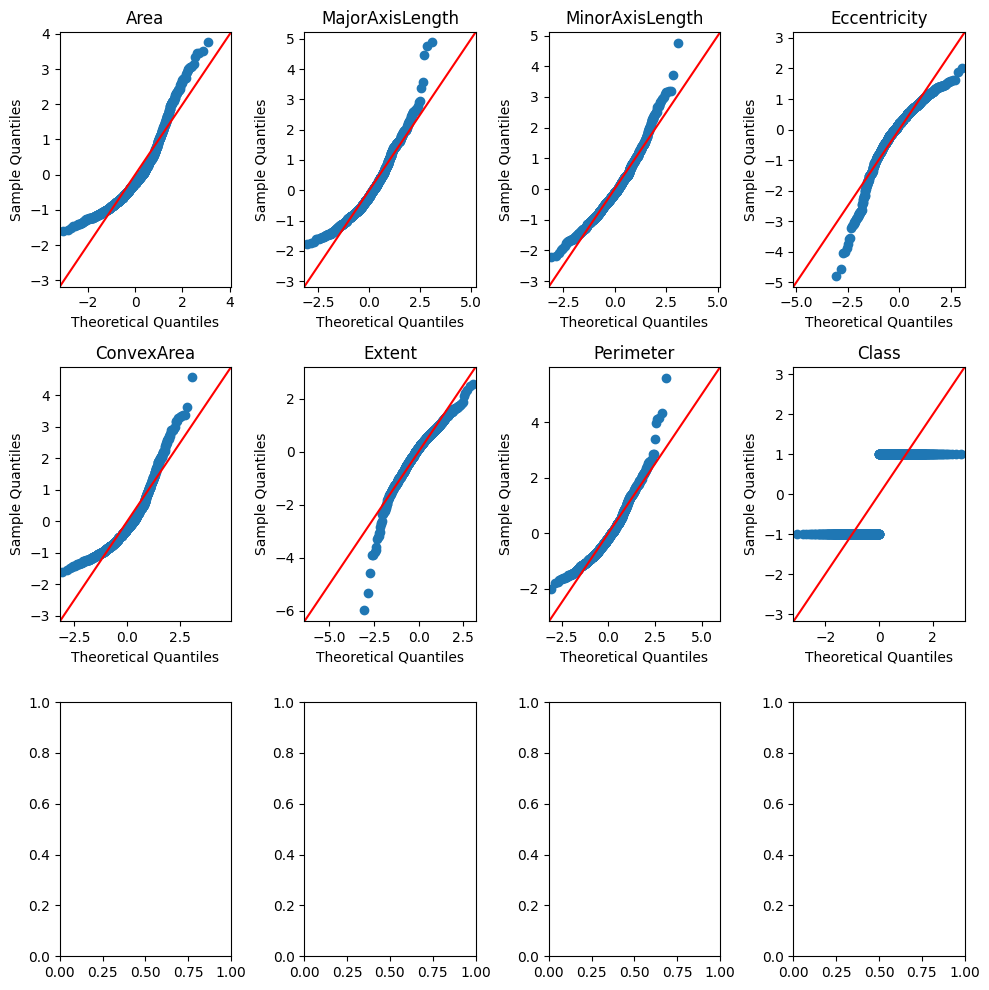

'videqqplot.png'

In [39]:
checking_normality_of_features_QQPLOT(df,"vide")

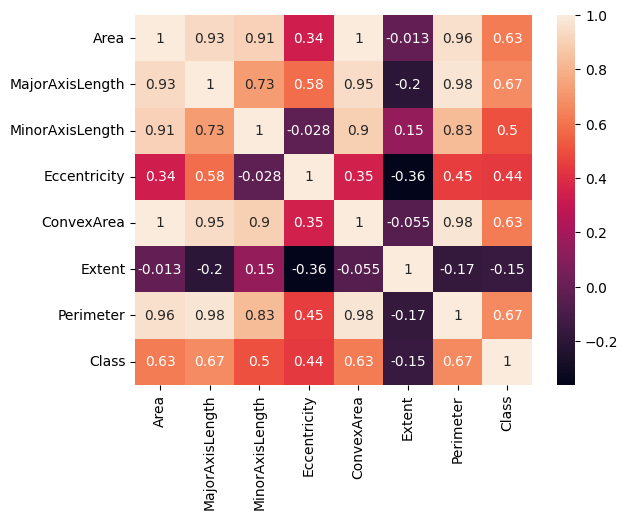

****************************************************************************************************
Liste des corrélations à analyser
****************************************************************************************************
Area > MajorAxisLength : 0.933
Area > MinorAxisLength : 0.907
Area > Eccentricity : 0.336
Area > ConvexArea : 0.996
Area > Perimeter : 0.961
Area > Class : 0.626
MajorAxisLength > MinorAxisLength : 0.728
MajorAxisLength > Eccentricity : 0.584
MajorAxisLength > ConvexArea : 0.945
MajorAxisLength > Extent : -0.204
MajorAxisLength > Perimeter : 0.978
MajorAxisLength > Class : 0.673
MinorAxisLength > ConvexArea : 0.896
MinorAxisLength > Extent : 0.145
MinorAxisLength > Perimeter : 0.827
MinorAxisLength > Class : 0.503
Eccentricity > ConvexArea : 0.348
Eccentricity > Extent : -0.361
Eccentricity > Perimeter : 0.448
Eccentricity > Class : 0.438
ConvexArea > Extent : -0.055
ConvexArea > Perimeter : 0.977
ConvexArea > Class : 0.626
Extent > Perimeter : -0.173
Ex

In [40]:
generate_correlation_matrix(df,0.05,"vide")
report.doc_add_image("videcorrelation_matrix.png")

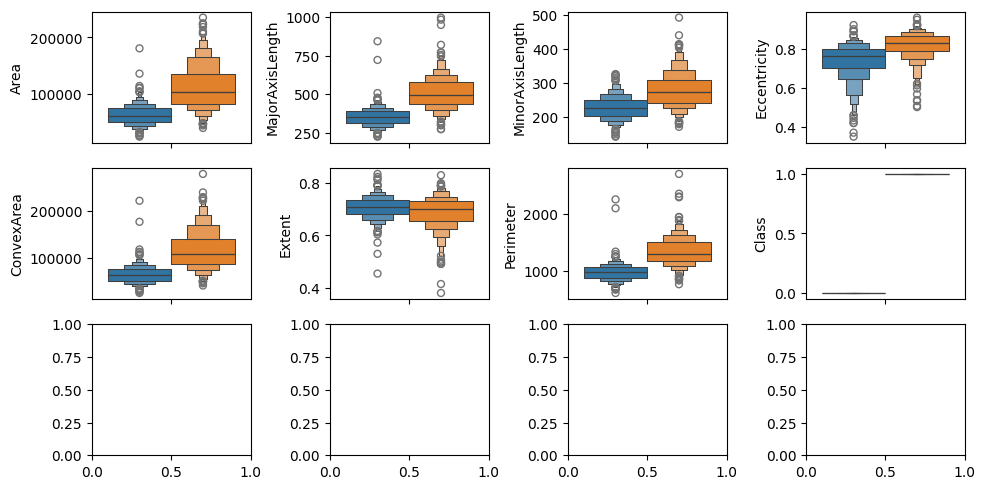

In [41]:
generate_box_plots(df,cible,"vide","classification")

28


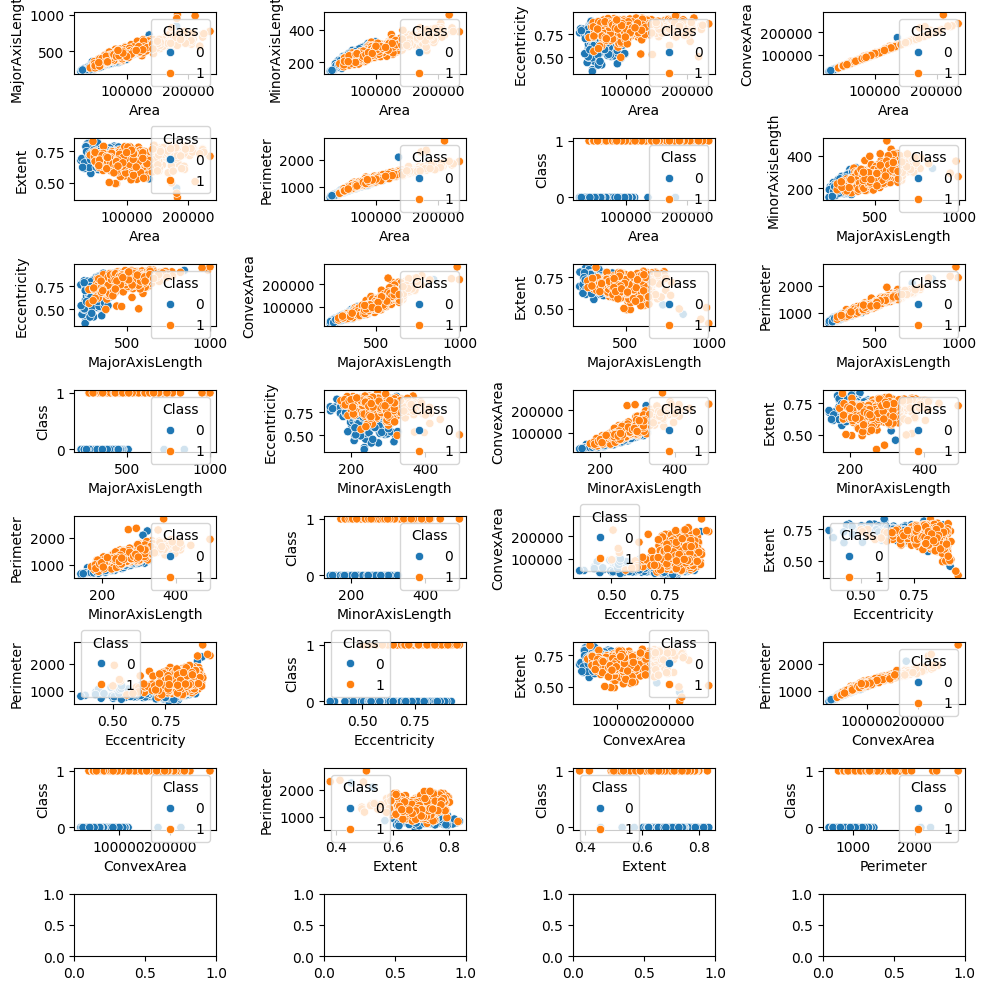

In [42]:
generate_scatter_plots(df,"vide",cible,"classification")

In [43]:
checking_outliers(df)

Outliers avant cleaning
85     2253.557
290    2098.263
469    1893.414
479    1870.280
487    2697.753
506    2303.690
516    1827.900
574    1865.297
580    1866.091
668    1876.028
694    2289.889
708    1876.307
812    1942.050
836    2352.029
855    1831.909
866    1853.893
880    1947.460
Name: Perimeter, dtype: float64
****************************************************************************************************
Outliers après cleaning
467    1791.568
657    1803.686
671    1789.254
804    1812.569
Name: Perimeter, dtype: float64
****************************************************************************************************


(        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
 0    87524.0       442.246011       253.291155      0.819738     90546.0   
 1    75166.0       406.690687       243.032436      0.801805     78789.0   
 2    90856.0       442.267048       266.328318      0.798354     93717.0   
 3    45928.0       286.540559       208.760042      0.684989     47336.0   
 4    79408.0       352.190770       290.827533      0.781542     81463.0   
 ..       ...              ...              ...           ...         ...   
 895  83248.0       430.077308       247.838695      0.817263     85839.0   
 896  87350.0       440.735698       259.293149      0.808629     90899.0   
 897  99657.0       431.706981       298.837323      0.721684    106264.0   
 898  93523.0       476.344094       254.176054      0.845739     97653.0   
 899  85609.0       512.081774       215.271976      0.907345     89197.0   
 
        Extent  Perimeter  Class  
 0    0.758651   1184.040      0  
 1  

In [44]:
report.report_builder()

In [45]:
print(report.report_name)

Raisins_analysis
